# By liulu

# ------------------------------------第十章 Python标准库-------------------------------------------

## 1.time库
Python处理时间的标准库

### 1.1 获取现在的时间
time.localtime() 本地时间

time.gmtime() UTC世界统一时间

北京时间比UTC时间统一时间早8个小时

In [1]:
import time

t_local = time.localtime()
t_utc = time.gmtime()

print("t_local",t_local)
print("t_utc",t_utc)

t_local time.struct_time(tm_year=2020, tm_mon=8, tm_mday=5, tm_hour=16, tm_min=19, tm_sec=31, tm_wday=2, tm_yday=218, tm_isdst=0)
t_utc time.struct_time(tm_year=2020, tm_mon=8, tm_mday=5, tm_hour=8, tm_min=19, tm_sec=31, tm_wday=2, tm_yday=218, tm_isdst=0)


In [2]:
time.ctime() #返回本地时间的字符串

'Wed Aug  5 16:20:16 2020'

### 1.2 时间戳与计时器
（1）time.time() 返回自纪元以来的秒数，记录sleep

（2）time.perf_counter() 随意选取一个时间点，记录现在时间到该时间点的间隔秒数，记录sleep

（3）time.process_time() 随意选取一个时间点，记录现在时间到该时间点的间隔秒数，不记录sleep

In [8]:
t_1_start = time.time()
t_2_start = time.perf_counter()
t_3_start = time.process_time()

res = 0
for i in range(10000):
    res += 1

time.sleep(5)

t_1_end = time.time()
t_2_end = time.perf_counter()
t_3_end = time.process_time()

print("time方法：{:.3f}秒".format(t_1_end-t_1_start))
print("perf_counter方法：{:.3f}秒".format(t_2_end-t_2_start))
print("process_time方法：{:.3f}秒".format(t_3_end-t_3_start))


time方法：5.002秒
perf_counter方法：5.002秒
process_time方法：0.000秒


### 1.3 格式化
time.strftime()自定义格式化输出

In [9]:
lctime = time.localtime()
time.strftime("%Y-%m-%d %A %H:%M:%S",lctime)

'2020-08-05 Wednesday 16:33:28'

### 1.4 睡觉

In [ ]:
time.sleep()

## 2.random库

### 2.1 随机种子----seed(a=None)
（1）相同的种子会产生相同的随机数

（2）如果不设置随机种子，以系统当前时间为默认值

In [10]:
from random import *

seed(10)
print(random())
seed(10)
print(random())

0.5714025946899135
0.5714025946899135


In [12]:
print(random())

0.5780913011344704


### 2.2 产生随机整数
（1）randint(a,b) 产生[a,b）之间的随机整数

In [13]:
numbers = [randint(1,10) for i in range(10)]
numbers

[4, 8, 8, 5, 3, 1, 9, 8, 6, 2]

（2）randrange(a)  产生[0,a)之间的随机整数

（3）randrange(a,b,step)  产生[a,b)之间以step为步长的随机整数

### 2.3 产生随机浮点数

（1）random()  产生[0.0,1.0)之间的随机浮点数

（2）uniform(a,b)  产生[a,b)之间的随机浮点数

### 2.4 序列用函数


（1）choice(seq)  从序列类型中随机返回一个元素

In [14]:
choice(['win','lose','draw'])

'win'

In [15]:
choice("Python")

'n'

（2）choices(seq.weights=None,k)  对序列类型进行k次重复采样，可设置权重

In [16]:
choices(['win','lose','draw'],k=5)

['draw', 'win', 'draw', 'lose', 'lose']

In [18]:
choices(['win','lose','draw'],[4,4,2],k=10)

['win', 'lose', 'lose', 'lose', 'lose', 'win', 'lose', 'draw', 'draw', 'lose']

（3）shuffle(seq)  将序列类型中元素随机排列，返回打乱后的序列

In [19]:
numbers = ["one","two","three","four"]
shuffle(numbers)
numbers

['two', 'four', 'three', 'one']

（4）sample(pop,k)  从pop类型中随机选取k个元素，以列表类型返回

In [20]:
sample([10, 20, 30, 40, 50],k=3)

[20, 50, 10]

### 2.5 概率分布----以高斯分布为例
gauss(mean,std)----产生一个符合高斯分布的随机数

In [21]:
number = gauss(0,1)
number

0.7917381338804127

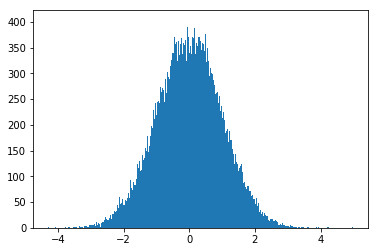

In [22]:
import matplotlib.pyplot as plt

res = [gauss(0,1) for i in range(100000)]

plt.hist(res, bins=1000)
plt.show()

In [25]:
# 例：生产4位由数字和英文字母构成的验证码

import random
import string

print(string.digits)
print(string.ascii_letters)

s = string.digits + string.ascii_letters
v = random.sample(s,4)

print(v)
print(''.join(v))

0123456789
abcdefghijklmnopqrstuvwxyzABCDEFGHIJKLMNOPQRSTUVWXYZ
['5', 'n', 'F', 'v']
5nFv


## 3.collections库----容器数据类型

### 3.1 namedtuple----具名元组
定义方法如下：typename是元组名字，field_names是域名

In [ ]:
collections.namedtuple(typenamed,field_names, *,rename=False,default=None,module=None)

In [4]:
import collections

Point = collections.namedtuple("Point", ["x","y"])   #定义一个坐标点
p = Point(1,2)
p

Point(x=1, y=2)

#### （1）可以调用属性

In [5]:
print(p.x)
print(p.y)

1
2


#### （2）有元组的性质

In [6]:
print(p[0])
print(p[1])
x, y = p
print(x)
print(y)

1
2
1
2


#### （3）确实是元组的子类

In [7]:
print(isinstance(p,tuple))

True


#### 例：模拟扑克牌

In [10]:
import collections
Card = collections.namedtuple("Card",["rank","suit"])
ranks = [str(n) for n in range(2,11)] + list("JQKA")
suits = "spades diamonds clubs hearts".split(" ")
print("ranks",ranks)
print("suits",suits)

cards = [Card(rank, suit) for rank in ranks for suit in suits]
cards

ranks ['2', '3', '4', '5', '6', '7', '8', '9', '10', 'J', 'Q', 'K', 'A']
suits ['spades', 'diamonds', 'clubs', 'hearts']


[Card(rank='2', suit='spades'),
 Card(rank='2', suit='diamonds'),
 Card(rank='2', suit='clubs'),
 Card(rank='2', suit='hearts'),
 Card(rank='3', suit='spades'),
 Card(rank='3', suit='diamonds'),
 Card(rank='3', suit='clubs'),
 Card(rank='3', suit='hearts'),
 Card(rank='4', suit='spades'),
 Card(rank='4', suit='diamonds'),
 Card(rank='4', suit='clubs'),
 Card(rank='4', suit='hearts'),
 Card(rank='5', suit='spades'),
 Card(rank='5', suit='diamonds'),
 Card(rank='5', suit='clubs'),
 Card(rank='5', suit='hearts'),
 Card(rank='6', suit='spades'),
 Card(rank='6', suit='diamonds'),
 Card(rank='6', suit='clubs'),
 Card(rank='6', suit='hearts'),
 Card(rank='7', suit='spades'),
 Card(rank='7', suit='diamonds'),
 Card(rank='7', suit='clubs'),
 Card(rank='7', suit='hearts'),
 Card(rank='8', suit='spades'),
 Card(rank='8', suit='diamonds'),
 Card(rank='8', suit='clubs'),
 Card(rank='8', suit='hearts'),
 Card(rank='9', suit='spades'),
 Card(rank='9', suit='diamonds'),
 Card(rank='9', suit='clubs'),


In [11]:
from random import *

#洗牌
shuffle(cards)
cards

[Card(rank='9', suit='hearts'),
 Card(rank='J', suit='diamonds'),
 Card(rank='K', suit='spades'),
 Card(rank='J', suit='hearts'),
 Card(rank='3', suit='clubs'),
 Card(rank='2', suit='spades'),
 Card(rank='3', suit='spades'),
 Card(rank='4', suit='hearts'),
 Card(rank='K', suit='hearts'),
 Card(rank='A', suit='diamonds'),
 Card(rank='J', suit='spades'),
 Card(rank='Q', suit='diamonds'),
 Card(rank='K', suit='diamonds'),
 Card(rank='7', suit='hearts'),
 Card(rank='K', suit='clubs'),
 Card(rank='10', suit='clubs'),
 Card(rank='Q', suit='hearts'),
 Card(rank='8', suit='spades'),
 Card(rank='A', suit='hearts'),
 Card(rank='5', suit='hearts'),
 Card(rank='6', suit='clubs'),
 Card(rank='4', suit='spades'),
 Card(rank='A', suit='spades'),
 Card(rank='7', suit='diamonds'),
 Card(rank='3', suit='diamonds'),
 Card(rank='10', suit='spades'),
 Card(rank='7', suit='clubs'),
 Card(rank='Q', suit='clubs'),
 Card(rank='9', suit='spades'),
 Card(rank='4', suit='diamonds'),
 Card(rank='6', suit='hearts')

In [12]:
#随机抽取一张牌
choice(cards)

Card(rank='2', suit='hearts')

In [18]:
#s随机抽取多张牌
sample(cards,k=10)

[Card(rank='8', suit='hearts'),
 Card(rank='3', suit='clubs'),
 Card(rank='Q', suit='diamonds'),
 Card(rank='K', suit='clubs'),
 Card(rank='9', suit='hearts'),
 Card(rank='7', suit='clubs'),
 Card(rank='5', suit='hearts'),
 Card(rank='4', suit='diamonds'),
 Card(rank='Q', suit='clubs'),
 Card(rank='10', suit='clubs')]

### 3.2 Counter----计数器工具

In [20]:
from collections import Counter

In [21]:
s = "牛奶奶找刘奶奶买牛奶"
cnt_str = Counter(s)
print(cnt_str)

Counter({'奶': 5, '牛': 2, '找': 1, '刘': 1, '买': 1})


#### （1）是字典的一个类

In [22]:
print(isinstance(Counter(),dict))

True


#### （2）最常见的统计----most_common(n)
提供n个频率最高的元素和计数

In [23]:
cnt_str.most_common(3)

[('奶', 5), ('牛', 2), ('找', 1)]

#### （3）元素展开----elements()

In [25]:
list(cnt_str.elements())

['牛', '牛', '奶', '奶', '奶', '奶', '奶', '找', '刘', '买']

#### 例：从一副牌中抽取10张，大于10的比例有多少

In [28]:
cards = collections.Counter(tens = 16,low_cards = 36)
seen = sample(list(cards.elements()),k = 10)
print(seen)

['low_cards', 'low_cards', 'tens', 'low_cards', 'tens', 'low_cards', 'tens', 'low_cards', 'tens', 'low_cards']


In [29]:
seen.count("tens")/10

0.4

### 3.3 deque----双向队列

#### 双向队列可以方便的在队列两边高效、快速的增加和删除元素

In [30]:
from collections import deque

d = deque("cde")
d

deque(['c', 'd', 'e'])

In [31]:
d.append("f")  #右端增加
d.appendleft("b")  #左端增加
d

deque(['b', 'c', 'd', 'e', 'f'])

In [35]:
d = deque("cde")
d.pop()  #右端删除
d.popleft()  # 左端删除
d

deque(['d'])

## 4.itertools库----迭代器
### 4.1 排列组合迭代器

#### （1）product----笛卡尔积

In [36]:
import itertools

for i in itertools.product('ABC', '01'):
    print(i)

('A', '0')
('A', '1')
('B', '0')
('B', '1')
('C', '0')
('C', '1')


In [38]:
list(itertools.product('ABC', '01'))

[('A', '0'), ('A', '1'), ('B', '0'), ('B', '1'), ('C', '0'), ('C', '1')]

In [39]:
import itertools

#for i in itertools.product('ABC', repeat = 3):
   # print(i)

#### （2）permutations----排列

In [40]:
for i in itertools.permutations("ABCD",3):
    print(i)

('A', 'B', 'C')
('A', 'B', 'D')
('A', 'C', 'B')
('A', 'C', 'D')
('A', 'D', 'B')
('A', 'D', 'C')
('B', 'A', 'C')
('B', 'A', 'D')
('B', 'C', 'A')
('B', 'C', 'D')
('B', 'D', 'A')
('B', 'D', 'C')
('C', 'A', 'B')
('C', 'A', 'D')
('C', 'B', 'A')
('C', 'B', 'D')
('C', 'D', 'A')
('C', 'D', 'B')
('D', 'A', 'B')
('D', 'A', 'C')
('D', 'B', 'A')
('D', 'B', 'C')
('D', 'C', 'A')
('D', 'C', 'B')


In [41]:
for i in itertools.permutations(range(3)):
    print(i)

(0, 1, 2)
(0, 2, 1)
(1, 0, 2)
(1, 2, 0)
(2, 0, 1)
(2, 1, 0)


#### （3）combinations----组合

In [43]:
for i in itertools.combinations("ABCD",2):  #2是组合的长度
    print(i)


('A', 'B')
('A', 'C')
('A', 'D')
('B', 'C')
('B', 'D')
('C', 'D')


In [51]:
for i in itertools.combinations(range(4),3):  #这里的3不可省
    print(i)

(0, 1, 2)
(0, 1, 3)
(0, 2, 3)
(1, 2, 3)


#### （4）combinations_with_replacement----元素可重复组合

In [52]:
for i in itertools.combinations_with_replacement("ABC",2): 
    print(i)

('A', 'A')
('A', 'B')
('A', 'C')
('B', 'B')
('B', 'C')
('C', 'C')


In [53]:
for i in itertools.product("ABC",repeat=2):
    print(i)

('A', 'A')
('A', 'B')
('A', 'C')
('B', 'A')
('B', 'B')
('B', 'C')
('C', 'A')
('C', 'B')
('C', 'C')


### 4.2 拉链

#### （1）zip----短拉链

In [55]:
for i in zip("ABC","012","xyz"):
    print(i)

('A', '0', 'x')
('B', '1', 'y')
('C', '2', 'z')


#### 长度不一致时，执行到最短的对象处就停止

In [56]:
for i in zip("ABC","012345"):
    print(i)

('A', '0')
('B', '1')
('C', '2')


#### （2）zip_longest----长拉链

In [59]:
for i in itertools.zip_longest("ABC","012345"):
    print(i)

('A', '0')
('B', '1')
('C', '2')
(None, '3')
(None, '4')
(None, '5')


### 4.3 无穷迭代器

#### （1）count(start=0,step=1)----计数
创建一个迭代器，它从start值开始，返回均匀间隔的值

#### （2）cycle(iterable)----循环
创建一个迭代器。返回iterable中的所有元素，无限重复

#### （3）repeat(object,times)----重复
创建一个迭代器，不断重复object，除非设定参数times，否则将无线重复

### 4.4 其他

#### （1）chain(iterables)----锁链
把一组迭代对象串联起来，形成一个更大的迭代器

In [2]:
import itertools
for i in itertools.chain("ABC",[1,2,3]):
    print(i)

A
B
C
1
2
3


#### （2）enumerate(iterable,start=0)----枚举（Python内置）
产生由两个元素组成的元组，结构是(index,item),其中index是从start开始，item是从iterable中提取

In [3]:
for i in enumerate("Python",start=1):
    print(i)

(1, 'P')
(2, 'y')
(3, 't')
(4, 'h')
(5, 'o')
(6, 'n')


#### （3）groupby(iterable,key=None)----分组
创建一个迭代器，按照key指定的方式返回iterable中连续的键和组，一般来说，要预先对数据进行排序，key为None默认吧连续重复元素进行分组

In [4]:
for key,group in itertools.groupby("AAAABBBBCCDAABB"):
    print(key,list(group))

A ['A', 'A', 'A', 'A']
B ['B', 'B', 'B', 'B']
C ['C', 'C']
D ['D']
A ['A', 'A']
B ['B', 'B']


In [5]:
type(group)

itertools._grouper

In [6]:
animals = ["duck","eagle","rat","giraffe","bear","bat","dolphin","shark","lion"]
animals.sort(key=len)
print(animals)

['rat', 'bat', 'duck', 'bear', 'lion', 'eagle', 'shark', 'giraffe', 'dolphin']


In [7]:
for key, group in itertools.groupby(animals,key=len):
    print(key,list(group))

3 ['rat', 'bat']
4 ['duck', 'bear', 'lion']
5 ['eagle', 'shark']
7 ['giraffe', 'dolphin']


In [8]:
animals = ["duck","eagle","rat","giraffe","bear","bat","dolphin","shark","lion"]
animals.sort(key=lambda x:x[0])
print(animals)

['bear', 'bat', 'duck', 'dolphin', 'eagle', 'giraffe', 'lion', 'rat', 'shark']


In [9]:
for key, group in itertools.groupby(animals,key=lambda x:x[0]):
    print(key,list(group))

b ['bear', 'bat']
d ['duck', 'dolphin']
e ['eagle']
g ['giraffe']
l ['lion']
r ['rat']
s ['shark']
